# Exploratory Data Analysis on 120 years of Olympic history

This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I scraped this data from www.sports-reference.com in May 2018. The R code I used to scrape and wrangle the data is on GitHub. I recommend checking my kernel before starting your own analysis.

Note that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. A common mistake people make when analyzing this data is to assume that the Summer and Winter Games have always been staggered.


**Contents**

The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:


`ID` - Unique number for each athlete

`Name` - Athlete's name

`Sex` - M or F

`Age` - Integer

`Height` - In centimeters

`Weight` - In kilograms

`Team` - Team name

`NOC` - National Olympic Committee 3-letter code

`Games` - Year and season

`Year` - Integer

`Season` - Summer or Winter

`City` - Host city

`Sport` - Sport

`Event` - Event

`Medal` - Gold, Silver, Bronze, or NA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 'athlete_events.csv',
 'noc_regions.csv',
 'olympics.ipynb']

In [3]:
data=pd.read_csv("athlete_events.csv")
region=pd.read_csv("noc_regions.csv")

In [4]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
data.shape

(271116, 15)

In [6]:
data.describe().round(2)

,ID,Age,Height,Weight,Year
count,271116.00,261642.00,210945.00,208241.00,271116.00
mean,68248.95,25.56,175.34,70.70,1978.38
std,39022.29,6.39,10.52,14.35,29.88
min,1.00,10.00,127.00,25.00,1896.00
25%,34643.00,21.00,168.00,60.00,1960.00
50%,68205.00,24.00,175.00,70.00,1988.00
75%,102097.25,28.00,183.00,79.00,2002.00
max,135571.00,97.00,226.00,214.00,2016.00


In [7]:
data.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [8]:
merged=pd.merge(data, region, on='NOC', how='left')

merged

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [9]:
#creste dataframe of only gold medalists
goldmedal=merged[merged['Medal']=='Gold']

goldmedal

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold,Georgia,NaN
271009,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold,Germany,NaN
271016,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold,Netherlands,NaN
271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold,Netherlands,NaN


In [10]:
goldmedal.isna().sum()

ID            0
Name          0
Sex           0
Age         148
Height     2833
Weight     3118
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region        1
notes     13201
dtype: int64

In [11]:
agenotnull=goldmedal[np.isfinite(goldmedal['Age'])]

agenotnull.isnull().sum()

ID            0
Name          0
Sex           0
Age           0
Height     2692
Weight     2976
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region        1
notes     13053
dtype: int64

C:\Users\Dhruv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gold Medalist in Olympics')

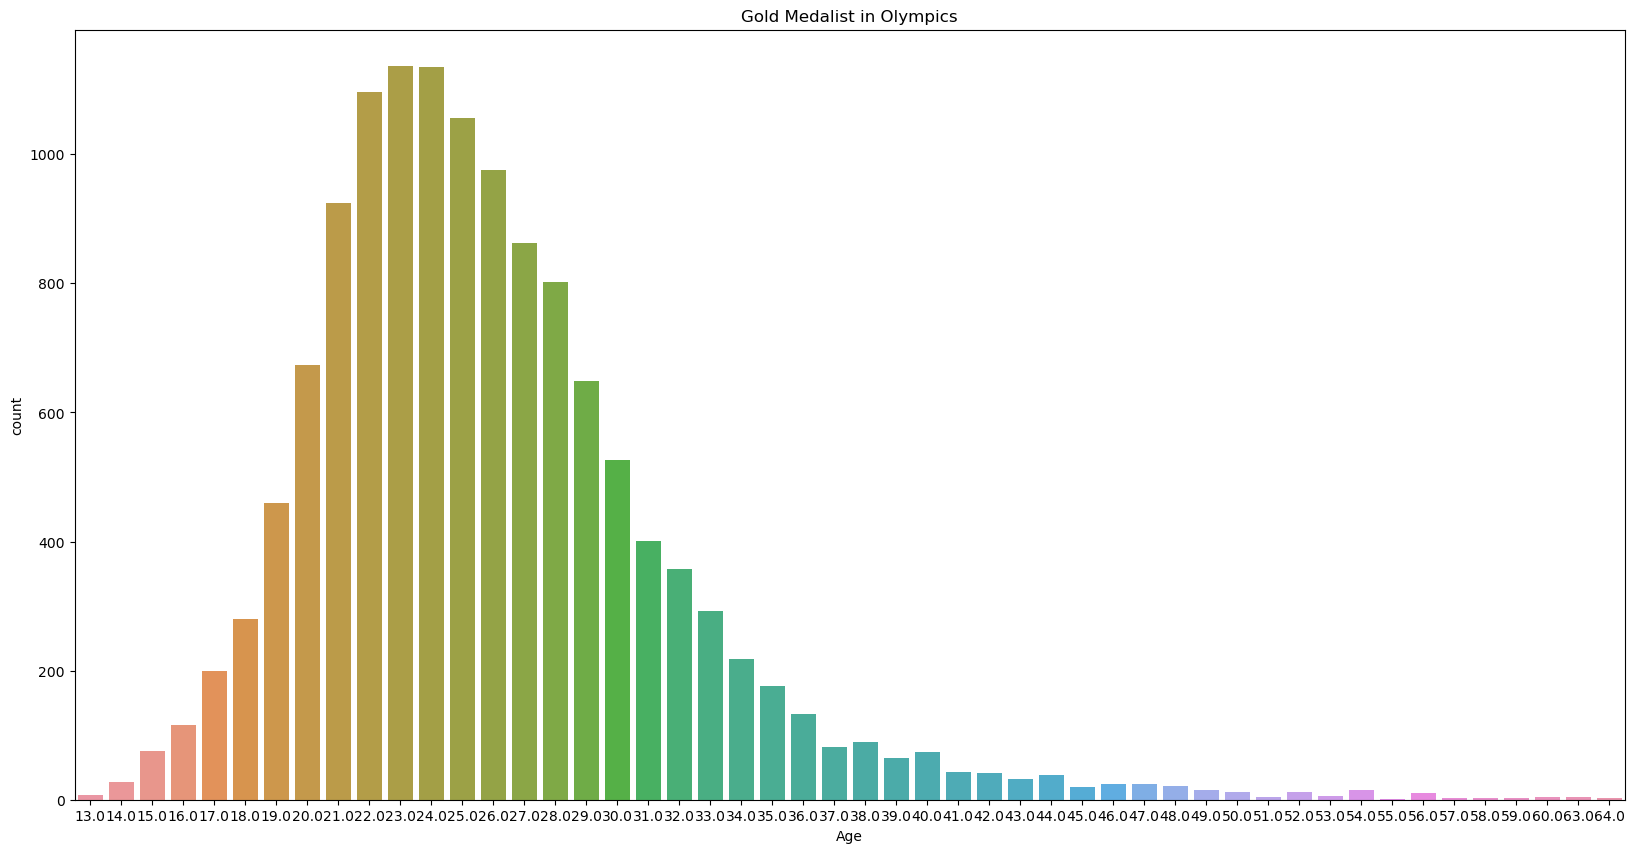

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(agenotnull['Age'])
plt.title('Gold Medalist in Olympics')

In [13]:
senior=goldmedal['ID'][goldmedal['Age']>50].count()

senior

65

C:\Users\Dhruv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sport', ylabel='count'>

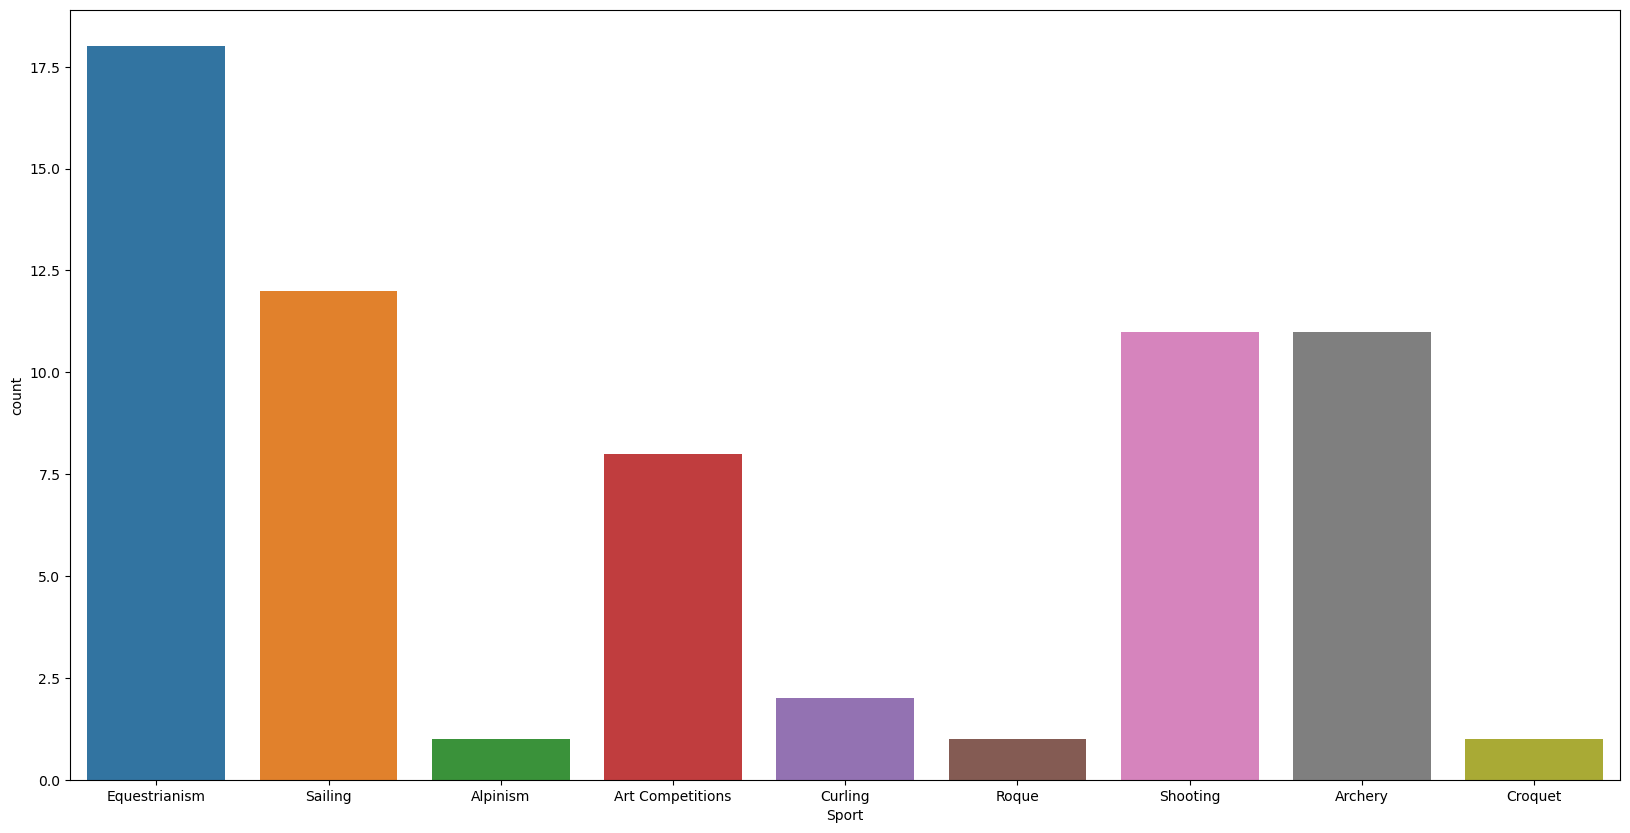

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(goldmedal['Sport'][goldmedal['Age']>50])

In [15]:
#medals by country
countrymedal=merged.groupby('region')['Medal'].count()

countrymedal

region
Afghanistan                 2
Albania                     0
Algeria                    17
American Samoa              0
Andorra                     0
                           ..
Virgin Islands, British     0
Virgin Islands, US          1
Yemen                       0
Zambia                      2
Zimbabwe                   22
Name: Medal, Length: 205, dtype: int64

In [16]:
plt.figure(figsize=(20,10))
#plt.bar(x=merged['region'],height=merged['Medal'])

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [17]:
merged.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [18]:
hwMerged=merged.dropna(subset=('Height','Weight'))
hwMerged

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [19]:
hwMerged.isna().sum()

ID             0
Name           0
Sex            0
Age          688
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     176657
region       270
notes     203359
dtype: int64

<AxesSubplot:xlabel='Height', ylabel='Weight'>

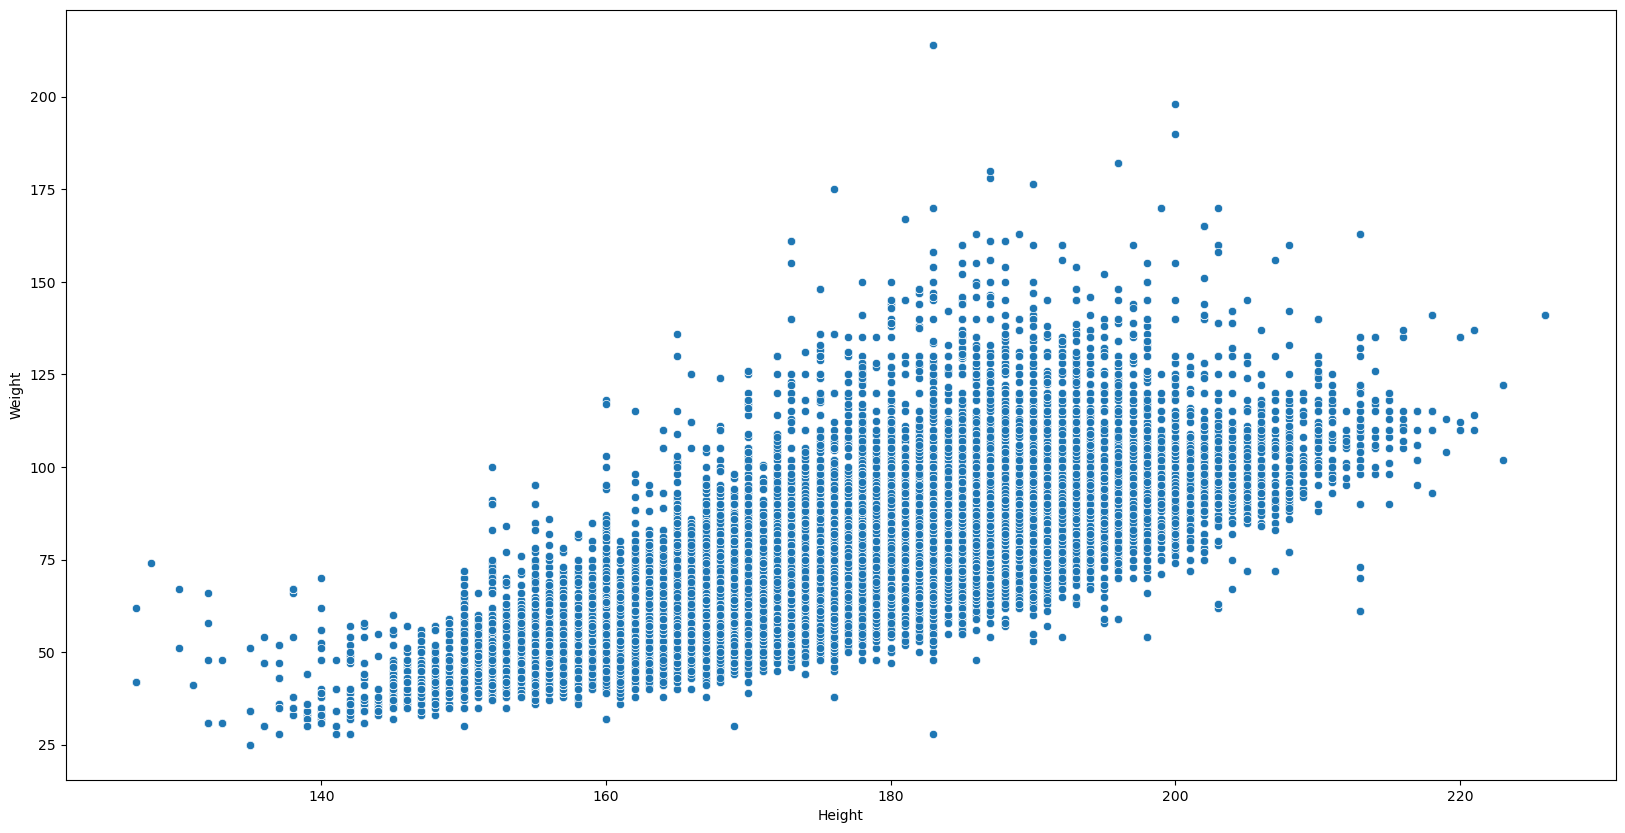

In [20]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="Height",y='Weight',data=hwMerged)

In [21]:
#women in summer olympoics over time
women=merged[(merged['Sex']=='F') & (merged['Season']=='Summer')]
women

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN
271099,135560,Stavroula Zygouri,F,36.0,171.0,63.0,Greece,GRE,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",NaN,Greece,NaN
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia,NaN
271103,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,64.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver,Russia,NaN


In [22]:
Women=women.groupby('Year')['Sex'].value_counts()
Women

Year  Sex
1900  F        33
1904  F        16
1906  F        11
1908  F        47
1912  F        87
1920  F       134
1924  F       244
1928  F       404
1932  F       347
1936  F       468
1948  F       628
1952  F      1497
1956  F       893
1960  F      1435
1964  F      1348
1968  F      1777
1972  F      2193
1976  F      2172
1980  F      1756
1984  F      2447
1988  F      3543
1992  F      4124
1996  F      5008
2000  F      5431
2004  F      5546
2008  F      5816
2012  F      5815
2016  F      6223
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Year'>

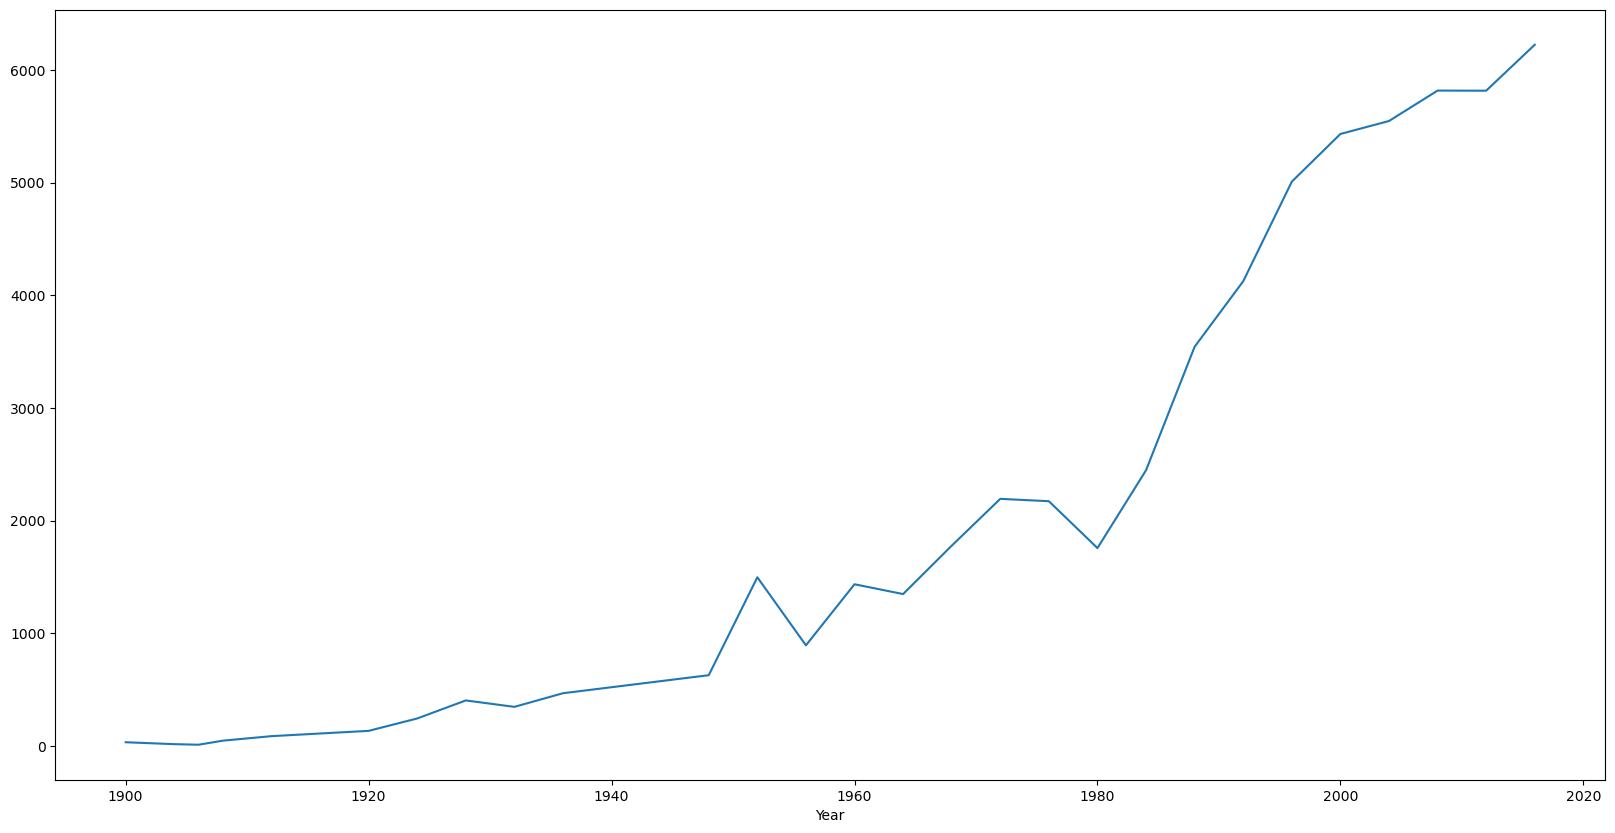

In [23]:
plt.figure(figsize=(20,10))
Women[:,"F"].plot()

In [24]:
men=merged[(merged['Sex']=='M') &(merged['Season']=='Summer')]
men

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,Finland,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271105,135565,Fernando scar Zylberberg,M,23.0,168.0,76.0,Argentina,ARG,2000 Summer,2000,Summer,Sydney,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN


In [25]:
Men=men.groupby('Year')['Sex'].value_counts()
Men

Year  Sex
1896  M       380
1900  M      1903
1904  M      1285
1906  M      1722
1908  M      3054
1912  M      3953
1920  M      4158
1924  M      4989
1928  M      4588
1932  M      2622
1936  M      6038
1948  M      5777
1952  M      6773
1956  M      4234
1960  M      6684
1964  M      6354
1968  M      6811
1972  M      8111
1976  M      6469
1980  M      5435
1984  M      7007
1988  M      8494
1992  M      8853
1996  M      8772
2000  M      8390
2004  M      7897
2008  M      7786
2012  M      7105
2016  M      7465
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Year'>

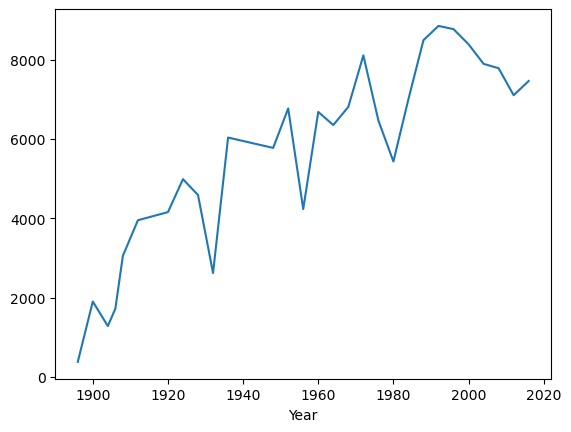

In [26]:
Men[:,"M"].plot()